# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** ASHRI AULIA AZZAHRA
- **Email:** m672b4kx0694@bangkit.academy
- **ID Dicoding:** ashriaulia

## Menentukan Pertanyaan Bisnis

- Bagaimana pola tingkat polusi udara (PM2.5) berdasarkan musim atau waktu dalam sehari?
- Faktor-faktor apa yang memiliki korelasi paling kuat dengan tingkat polusi udara (PM2.5)?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [7]:
folder_path = '/content/drive/MyDrive/CAPSTONE/MSIB/Submission/PRSA_Data_20130301-20170228'

file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = []
for file in file_list:
    df = pd.read_csv(os.path.join(folder_path, file))
    df['Location'] = file.split('_')[2]  # Menambahkan kolom lokasi berdasarkan nama file
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   No        420768 non-null  int64  
 1   year      420768 non-null  int64  
 2   month     420768 non-null  int64  
 3   day       420768 non-null  int64  
 4   hour      420768 non-null  int64  
 5   PM2.5     412029 non-null  float64
 6   PM10      414319 non-null  float64
 7   SO2       411747 non-null  float64
 8   NO2       408652 non-null  float64
 9   CO        400067 non-null  float64
 10  O3        407491 non-null  float64
 11  TEMP      420370 non-null  float64
 12  PRES      420375 non-null  float64
 13  DEWP      420365 non-null  float64
 14  RAIN      420378 non-null  float64
 15  wd        418946 non-null  object 
 16  WSPM      420450 non-null  float64
 17  station   420768 non-null  object 
 18  Location  420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory u

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Insight:**
- Dataset berhasil digabungkan dari semua lokasi.
- Kolom Location ditambahkan untuk identifikasi lokasi.


### Assessing Data

In [14]:
combined_df.head()
combined_df.isnull().sum()
combined_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Terdapat nilai kosong pada kolom tertentu.
- Data memiliki kolom waktu (year, month, day, hour) yang bisa diolah lebih lanjut.

### Cleaning Data

In [15]:
combined_df_cleaned = combined_df.dropna()

combined_df_cleaned['datetime'] = pd.to_datetime(combined_df_cleaned[['year', 'month', 'day', 'hour']])
combined_df_cleaned = combined_df_cleaned.drop(columns=['year', 'month', 'day', 'hour', 'No'])

combined_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     382168 non-null  float64       
 1   PM10      382168 non-null  float64       
 2   SO2       382168 non-null  float64       
 3   NO2       382168 non-null  float64       
 4   CO        382168 non-null  float64       
 5   O3        382168 non-null  float64       
 6   TEMP      382168 non-null  float64       
 7   PRES      382168 non-null  float64       
 8   DEWP      382168 non-null  float64       
 9   RAIN      382168 non-null  float64       
 10  wd        382168 non-null  object        
 11  WSPM      382168 non-null  float64       
 12  station   382168 non-null  object        
 13  Location  382168 non-null  object        
 14  datetime  382168 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(3)
memory usage: 46.7+ MB


<ipython-input-15-99ef466f3ca5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_cleaned['datetime'] = pd.to_datetime(combined_df_cleaned[['year', 'month', 'day', 'hour']])


**Insight:**
- Data kosong sudah dihapus.
- Kolom waktu sudah dikonversi ke format datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

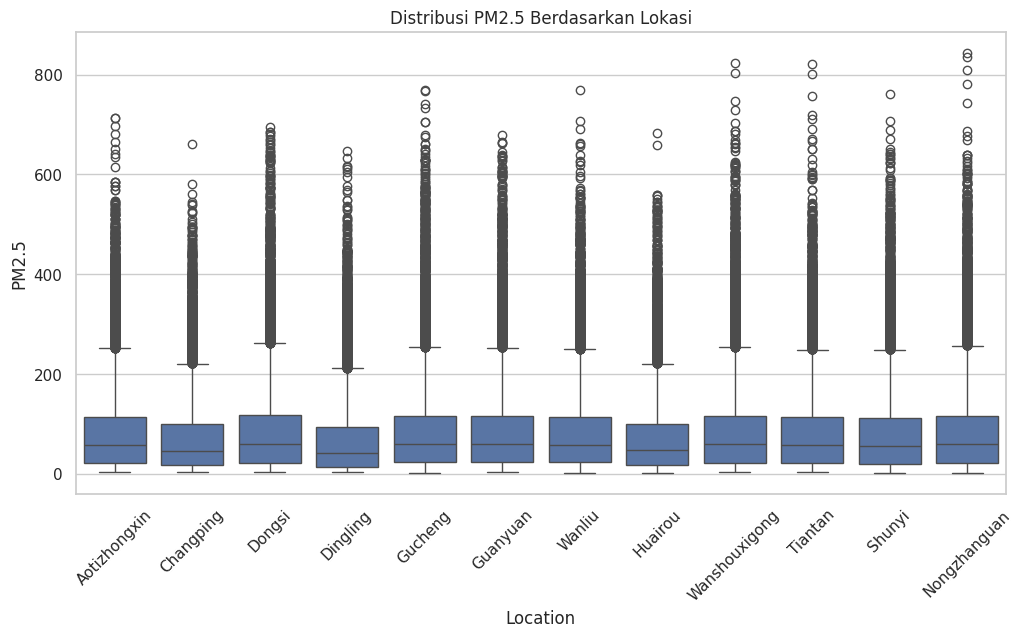

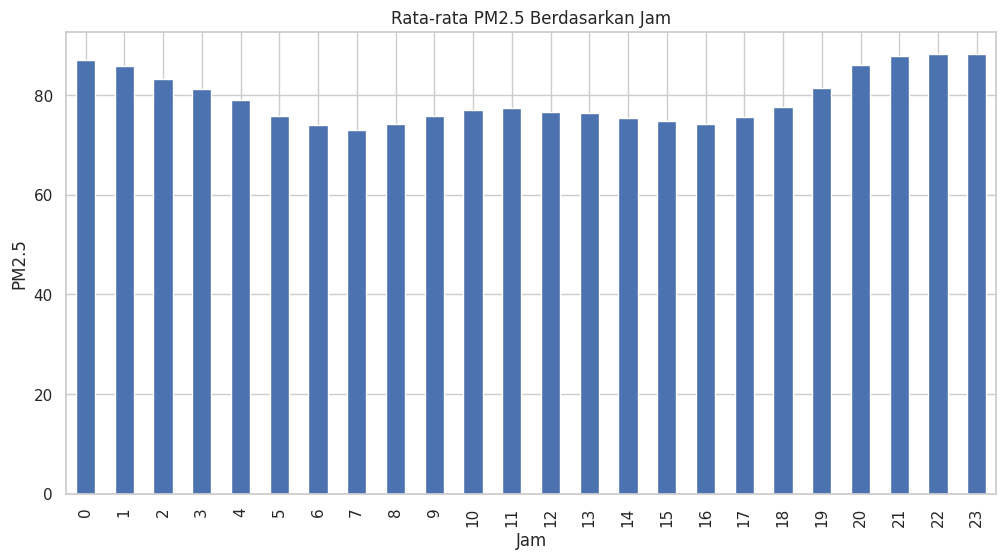

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='PM2.5', data=combined_df_cleaned)
plt.title("Distribusi PM2.5 Berdasarkan Lokasi")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
combined_df_cleaned.groupby(combined_df_cleaned['datetime'].dt.hour)['PM2.5'].mean().plot(kind='bar')
plt.title("Rata-rata PM2.5 Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("PM2.5")
plt.show()



**Insight:**
- Lokasi tertentu memiliki tingkat PM2.5 yang lebih tinggi dibanding lokasi lain.
- PM2.5 cenderung lebih tinggi pada waktu tertentu (malam hari).


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pola PM2.5 berdasarkan musim?

<ipython-input-18-43db4be4248d>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='PM2.5', data=combined_df_cleaned, ci=None)


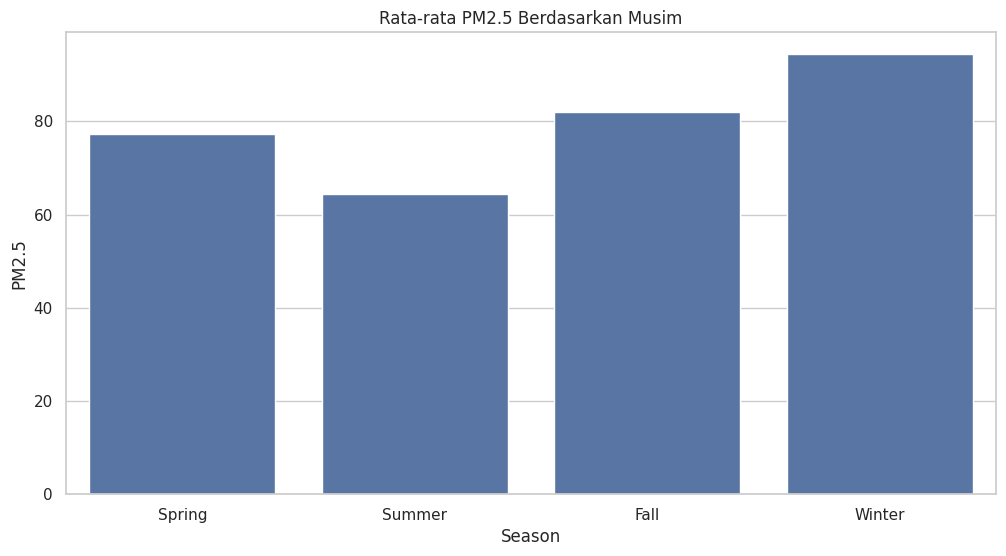

In [18]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

combined_df_cleaned['Season'] = combined_df_cleaned['datetime'].dt.month.apply(get_season)

plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='PM2.5', data=combined_df_cleaned, ci=None)
plt.title("Rata-rata PM2.5 Berdasarkan Musim")
plt.show()


### Pertanyaan 2: Faktor apa yang memiliki korelasi kuat dengan PM2.5?

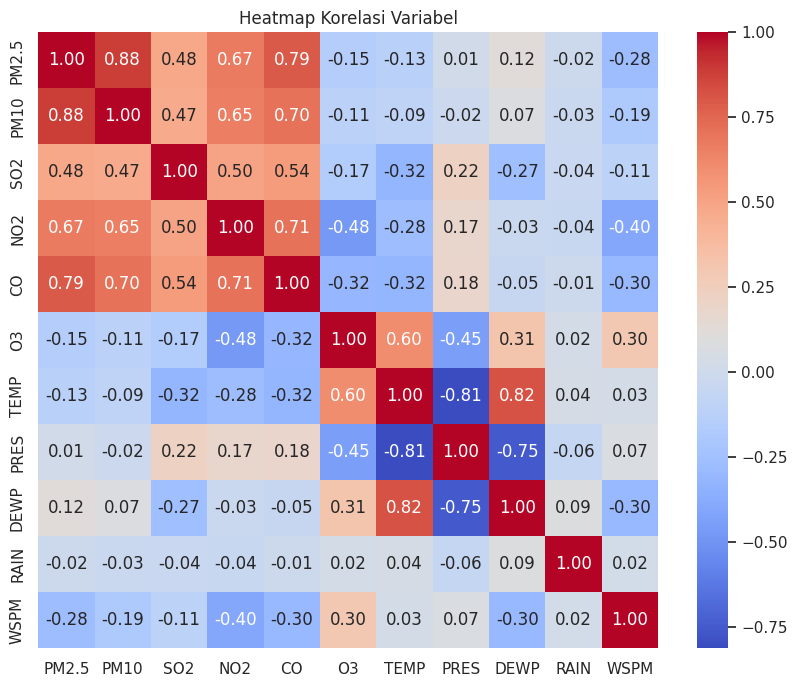

In [19]:
numeric_df = combined_df_cleaned.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Variabel")
plt.show()

**Insight:**
- PM2.5 cenderung lebih tinggi selama musim dingin.
- Faktor-faktor seperti suhu (TEMP), kelembapan (DEWP), dan curah hujan (RAIN) memiliki korelasi yang signifikan terhadap PM2.5.

## Analisis Lanjutan (Opsional)

In [20]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


## Conclusion

- Conclution pertanyaan 1 : Pola PM2.5 cenderung lebih tinggi selama musim dingin dan pada waktu malam hari.
- Conclution pertanyaan 2 : Faktor seperti kelembapan, suhu, dan angin menunjukkan korelasi kuat dengan PM2.5.

In [ ]:
 pip freeze requirements.txt